In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyorc
import glob
from matplotlib.colors import Normalize
import xarray as xr
import numpy as np

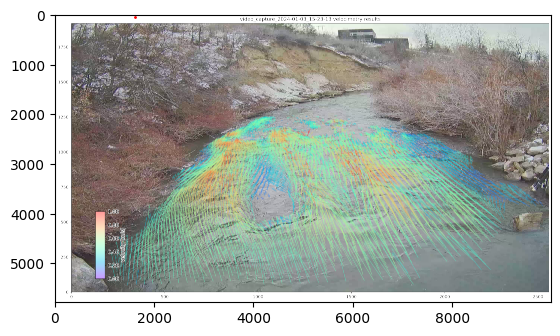

In [15]:
# img = mpimg.imread('January/results/video_capture_2024-01-01_13-16-25_velocimetry_results.png')
img = mpimg.imread('January/results/video_capture_2024-01-03_15-23-13_velocimetry_results.png')

# Display the image
plt.imshow(img)

plt.plot(1613, 40, "o", color="#FF0000", markersize=1)

# # Overlay a grid
# plt.grid(color='r', linestyle='-', linewidth=1)

# # Customize the grid
# plt.gca().set_xticks([i for i in range(0, img.shape[1], 50)])  # adjust the step as needed
# plt.gca().set_yticks([i for i in range(0, img.shape[0], 50)])  # adjust the step as needed
# plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
# plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

plt.show()


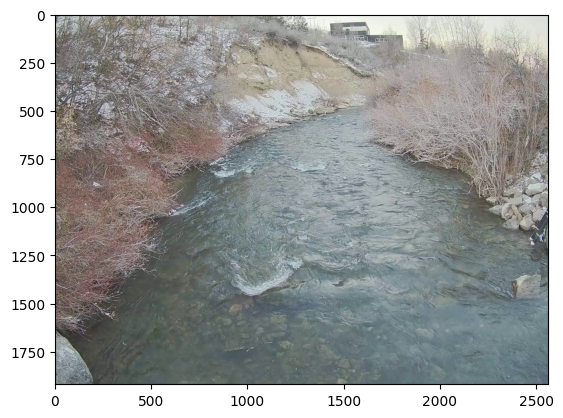

In [16]:
months = ['January', 'February', 'March', 'April', 'May', 'June']
videos = []
for month in months:
    for video in sorted(glob.glob("*.mp4", root_dir=f"{month}/")):
        videos.append(
            {
                'video': f'{month}/{video}',
                'name': video.split('.')[0]
            }
        )

v = videos.pop(0)

video_file = v['video']
video_name = v['name']
video = pyorc.api.video.Video(video_file, start_frame=0, end_frame=125)
frame = video.get_frame(0, method="rgb")

plt.plot(1000, 4000, "o", color="#FF0000", markersize=1)
plt.imshow(frame)

/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


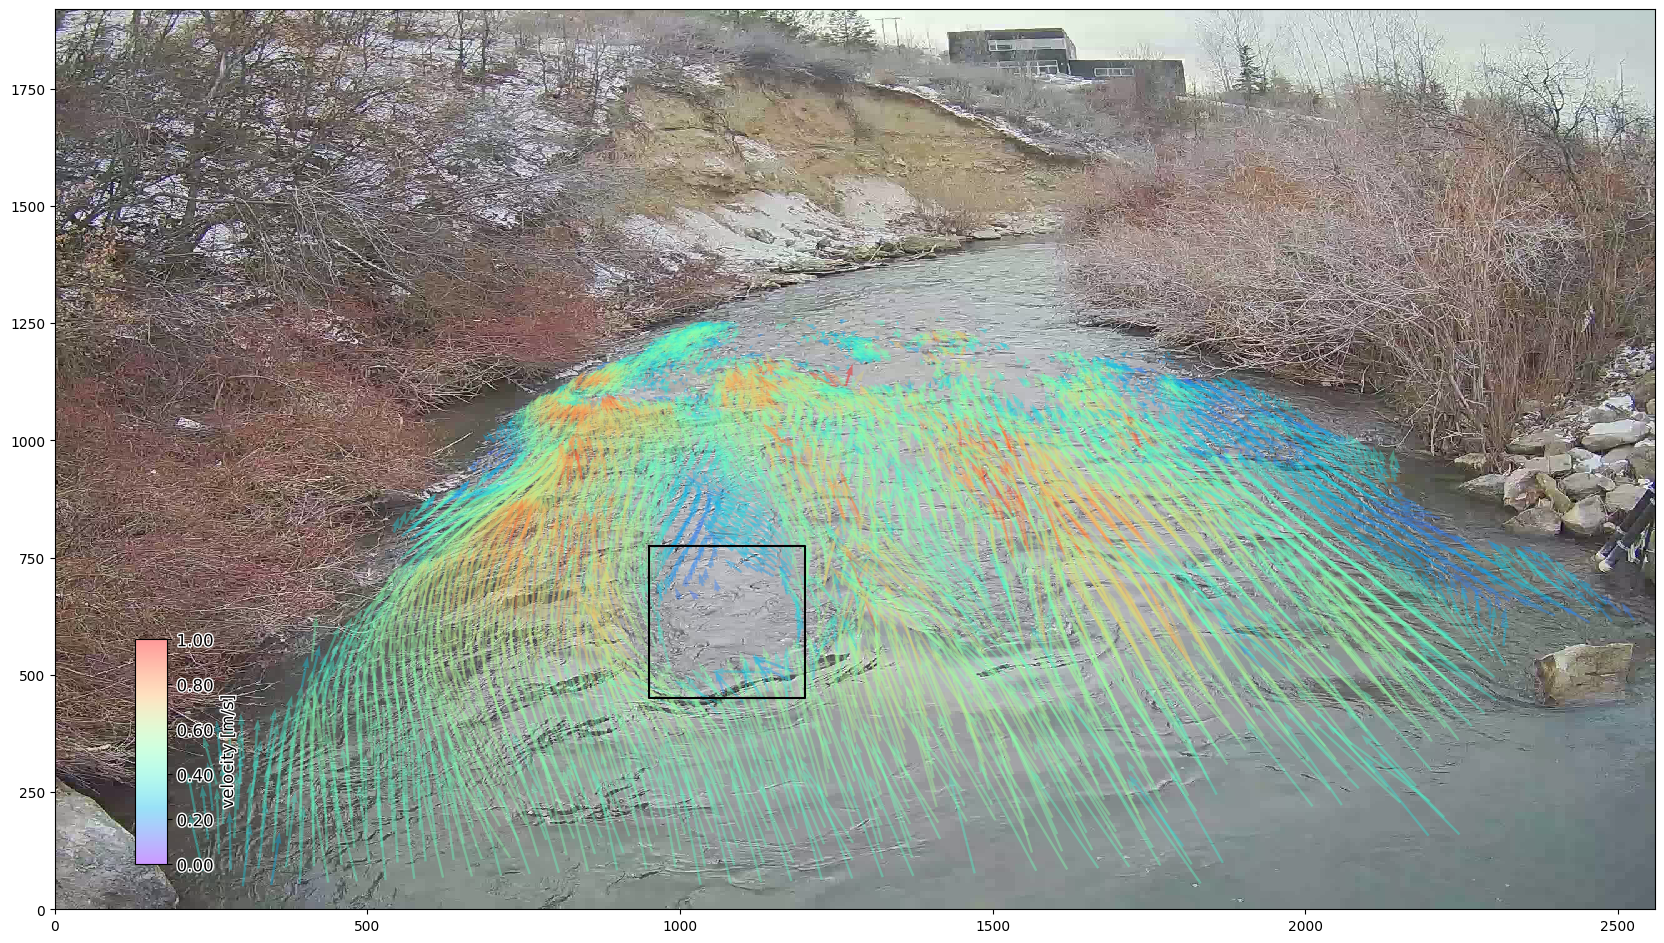

: 

In [48]:
video_file = 'January/video_capture_2024-01-03_15-23-13.mp4'
vector_file = 'January/results/video_capture_2024-01-03_15-23-13_velocimetry_results.nc'

ds = xr.open_dataset(vector_file)

ds.velocimetry.mask.corr(inplace=True)
ds.velocimetry.mask.minmax(inplace=True)
ds.velocimetry.mask.rolling(inplace=True)
ds.velocimetry.mask.outliers(inplace=True)
ds.velocimetry.mask.variance(inplace=True)
ds.velocimetry.mask.angle(angle_tolerance=0.5*np.pi)
ds.velocimetry.mask.count(inplace=True)
ds.velocimetry.mask.window_mean(wdw=2, inplace=True, tolerance=0.5, reduce_time=True)

video = pyorc.Video(video_file, start_frame=0, end_frame=125)
video.camera_config = ds.velocimetry.camera_config

ds = ds.mean(dim="time", keep_attrs=True)

ds.velocimetry.plot(
    ax=video.get_frames(method="rgb")[0].frames.plot(mode="camera").axes,
    mode="camera",
    alpha=0.4,
    cmap="rainbow",
    scale=200,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)

t, r, b, l = 775, 1200, 450, 950

# plt.plot(l, t, "o", color="#FF0000", markersize=5)
# plt.plot(r, t, "o", color="#FFFF00", markersize=5)
# plt.plot(r, b, "o", color="#00FF00", markersize=5)
# plt.plot(l, b, "o", color="#0000FF", markersize=5)

x = [l, r, r, l, l]
y = [t, t, b, b, t]
plt.plot(x, y, color="black")

plt.show()